# Deep Learning Algorithms

### Implementation of Neural Network

In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [45]:
# Check if GPU is available
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

# Checking the version of tensorflow
print("Tensorflow version: ", tf.__version__)

Num GPUs Available: 1
Tensorflow version:  2.16.2


In [46]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The above dataset is a binary classification dataset, tells whether the customer has exited or not.

In [47]:
# Split the dataset into features and labels
X = df.drop(columns=['RowNumber','CustomerId','Surname','Exited'], axis=1)
y = df['Exited']

In [48]:
# Check the shape of X and y
print(X.shape, y.shape)

(10000, 10) (10000,)


### Feature Engineering

In [49]:
# One-Hot Encoding
geo = pd.get_dummies(X['Geography'], drop_first=True)
gen = pd.get_dummies(X["Gender"], drop_first=True)

In [50]:
# Drop Gender and Geography columns in X
X.pop('Geography')
X.pop('Gender')

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [51]:
#Concatenate the one-hot encoded columns to X
X = pd.concat([X, geo, gen], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X shape",X_train.shape, X_test.shape)
print("y shape",y_train.shape, y_test.shape)

X shape (8000, 11) (2000, 11)
y shape (8000,) (2000,)


In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Artifical Neural Network - ANN

In [54]:
# Building of ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [55]:
# Initialising the ANN
classifier = Sequential()

In [56]:
# Adding the input layer.
classifier.add(Dense(units=11,activation='relu'))

# Adding the first hidden layer along with Dropout regularisation
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

# Adding the second hidden layer with PReLU activation function.
classifier.add(Dense(units=5))
classifier.add(PReLU())

# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [61]:
# Compiling the ANN - defining the loss function, optimizer and metrics
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss', # Stop when validation loss stops improving
    mode='auto', # The direction in which the monitored quantity should be improved
    verbose=1, 
    patience=5, # Wait for 5 epochs before stopping
    restore_best_weights=True  # Restore the best model weights
    )

In [66]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100,callbacks=[early_stop])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8367 - loss: 0.3872 - val_accuracy: 0.8478 - val_loss: 0.3654
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8314 - loss: 0.4016 - val_accuracy: 0.8489 - val_loss: 0.3664
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8419 - loss: 0.3865 - val_accuracy: 0.8482 - val_loss: 0.3662
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8403 - loss: 0.3861 - val_accuracy: 0.8459 - val_loss: 0.3639
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8368 - loss: 0.3817 - val_accuracy: 0.8455 - val_loss: 0.3690
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8326 - loss: 0.3894 - val_accuracy: 0.8478 - val_loss: 0.3667
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8370 - loss: 0.3877 - val_accuracy: 0.8501 - val_loss: 0.3654
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8336 - loss: 0.3912 - 

In [67]:
# list all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


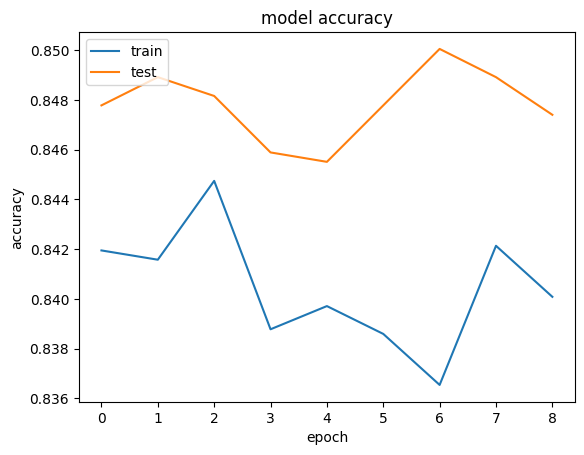

In [68]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

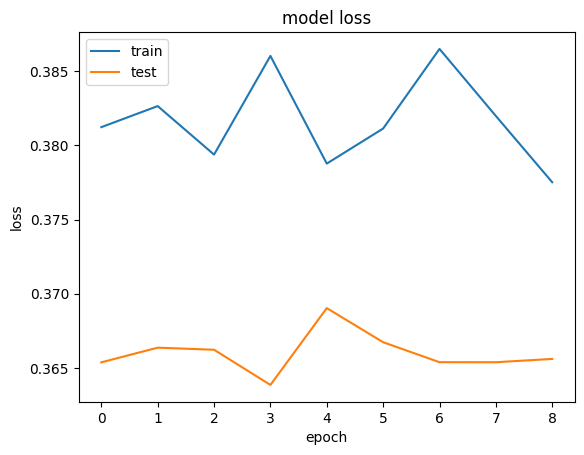

In [69]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Thus my model performs very well, as I am able to find the perfect values with minimum epochs

In [70]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [71]:
# Finding the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy: ", score)

Accuracy:  0.861


In [74]:
# Getting the model weights
classifier.get_weights()

[array([[-1.3244992e-01,  9.7649626e-02, -9.5793881e-02, -1.9613533e-01,
          2.4382967e-01, -1.2650280e-01, -4.8581153e-02, -1.4080393e-01,
          7.5555839e-02,  1.8690799e-01, -4.0208781e-01],
        [ 4.1381902e-01, -7.6495212e-01,  5.3547442e-01,  3.7289357e-01,
         -4.6417856e-01,  3.4002107e-01,  1.3344543e+00, -1.5782911e-01,
          3.5544091e-01,  2.3950022e-01,  5.0317061e-01],
        [ 1.8116117e-01,  2.7372476e-01, -1.6510256e-01, -3.2499593e-01,
          3.3671001e-01, -3.5194367e-02,  2.3120075e-01,  4.9694934e-01,
         -4.4477850e-01, -2.5637010e-01, -6.6070819e-01],
        [ 2.5607294e-01, -4.6357173e-01, -5.2977914e-01,  2.4121784e-01,
         -4.2980346e-01, -6.4119440e-01, -7.4518383e-01, -4.1525865e-01,
          1.3590454e-01,  5.6117219e-01,  6.6750652e-01],
        [ 1.2923819e+00,  4.8279092e-02,  9.0122983e-02,  1.0482901e-01,
          6.1303794e-02, -1.1101863e+00, -1.3823502e+00, -1.1049341e+00,
          7.5973326e-01,  2.8265327e-0

### Convolutional Neural Network - CNN

In [ ]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Define the CNN model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 2
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Flattening the feature maps
    Flatten(),

    # Fully Connected Layer (Dense Layer)
    Dense(units=128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting

    # Output Layer (for binary classification, use 'sigmoid'; for multi-class, use 'softmax')
    Dense(units=1, activation='sigmoid')
])

# Step 2: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Print Model Summary
model.summary()

# Step 4: Train the Model (Example Dataset: Replace X_train, y_train with real data)
# model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

In [ ]:
# Train the model (Replace X_train, y_train with real data)
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory('dataset/train', target_size=(64, 64), batch_size=32, class_mode='binary')

model.fit(train_data, epochs=10)